In [4]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

sns.set_theme()

In [121]:
data = {
    'L': 0.10128343899798979,
    'A': 0.04587392402453482,
    'G': 0.05204199096266515,
    'V': 0.08343212549181313,
    'E': 0.07848392694534645,
    'S': 0.03242100922632854,
    'I': 0.05353675927357696,
    'K': 0.07614727763173719,
    'R': 0.0878305241997835,
    'D': 0.05932683882274109,
    'T': 0.06166348813635036,
    'P': 0.033915777537240344,
    'N': 0.04120062539731629,
    'Q': 0.03858907616445887,
    'F': 0.033073896534542895,
    'Y': 0.04503204302183736,
    'M': 0.018126213425424805,
    'H': 0.04008384447537069,
    'C': 0.0014947683109118087,
    'W': 0.016442451420029897
}
df_letter_ratio = pd.DataFrame(pd.Series(data, name="ratio"))
df_letter_ratio

,ratio
L,0.101283
A,0.045874
G,0.052042
V,0.083432
E,0.078484
S,0.032421
I,0.053537
K,0.076147
R,0.087831
D,0.059327


In [122]:
df_per_letter_gender_ratio_missing = pd.read_csv("so-75186814.csv", index_col=0)
df_per_letter_gender_ratio_missing

,female,male,neutral,other,missing
index,,,,,
L,0.408163,0.306122,0.020408,0.0,0.265306
A,0.346154,0.346154,0.000000,0.0,0.307692
G,0.296296,0.111111,0.037037,0.0,0.555556
V,0.208333,0.562500,0.020833,0.0,0.208333
E,0.500000,0.225000,0.025000,0.0,0.250000


In [123]:
df_per_letter_gender_ratio = pd.concat([
    df_per_letter_gender_ratio_missing,
    pd.DataFrame({"missing": 1}, index=df_letter_ratio.index.difference(df_per_letter_gender_ratio_missing.index))
]).fillna(0)
df_per_letter_gender_ratio

,female,male,neutral,other,missing
L,0.408163,0.306122,0.020408,0.0,0.265306
A,0.346154,0.346154,0.000000,0.0,0.307692
G,0.296296,0.111111,0.037037,0.0,0.555556
V,0.208333,0.562500,0.020833,0.0,0.208333
E,0.500000,0.225000,0.025000,0.0,0.250000
C,0.000000,0.000000,0.000000,0.0,1.000000
D,0.000000,0.000000,0.000000,0.0,1.000000
F,0.000000,0.000000,0.000000,0.0,1.000000
H,0.000000,0.000000,0.000000,0.0,1.000000
I,0.000000,0.000000,0.000000,0.0,1.000000


In [124]:
df_gender_ratio = (
    df_per_letter_gender_ratio.mul(df_letter_ratio.ratio, axis="index").reindex(df_letter_ratio.index)
)
df_gender_ratio

,female,male,neutral,other,missing
L,0.041340,0.031005,0.002067,0.0,0.026871
A,0.015879,0.015879,0.000000,0.0,0.014115
G,0.015420,0.005782,0.001927,0.0,0.028912
V,0.017382,0.046931,0.001738,0.0,0.017382
E,0.039242,0.017659,0.001962,0.0,0.019621
S,0.000000,0.000000,0.000000,0.0,0.032421
I,0.000000,0.000000,0.000000,0.0,0.053537
K,0.000000,0.000000,0.000000,0.0,0.076147
R,0.000000,0.000000,0.000000,0.0,0.087831
D,0.000000,0.000000,0.000000,0.0,0.059327


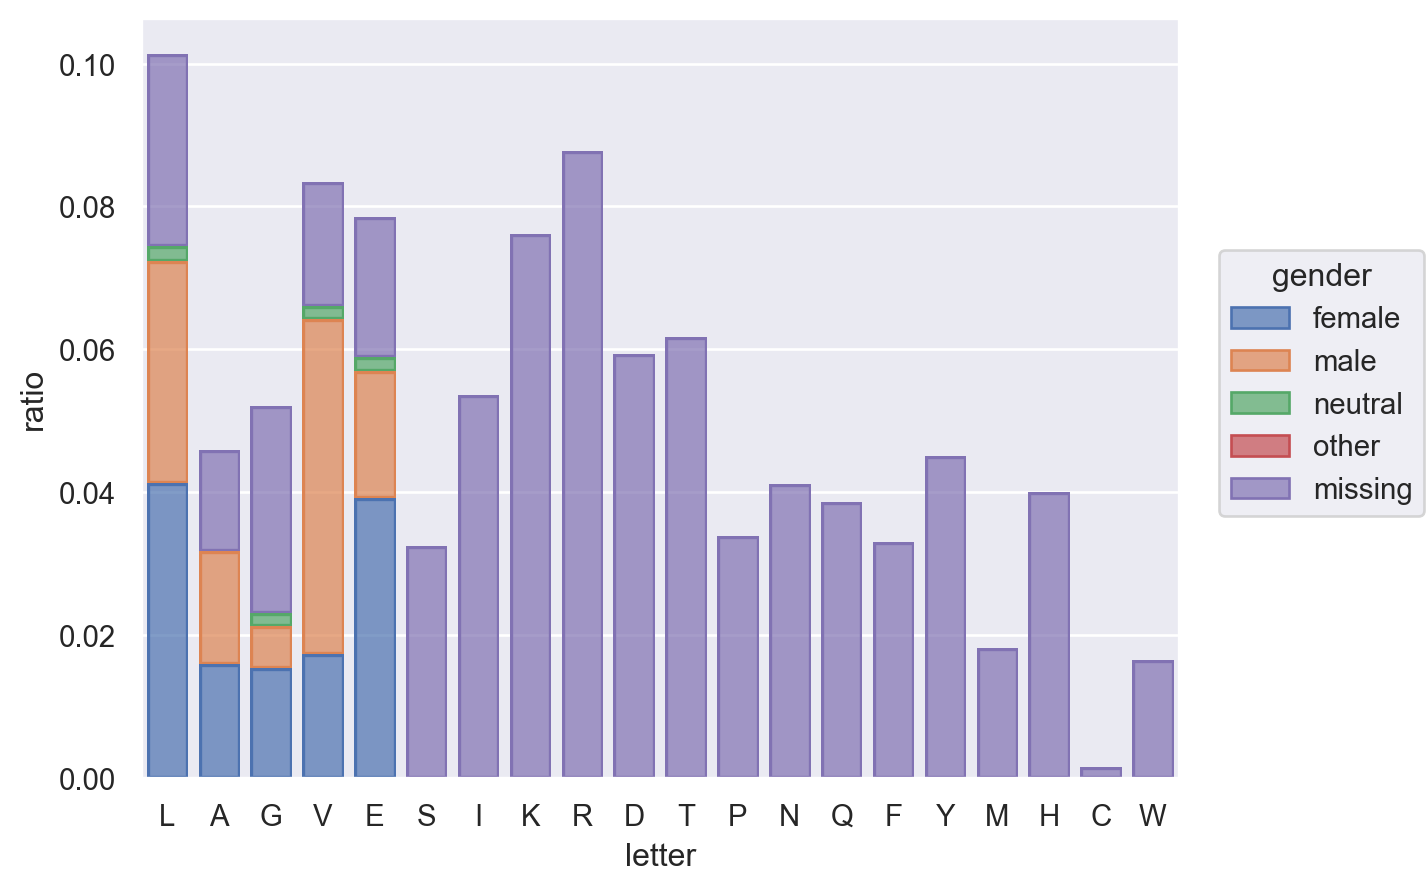

In [131]:
(
    so.Plot(
        df_gender_ratio
            .rename_axis("letter")
            .melt(
                var_name=["gender"], value_name="ratio",
                ignore_index=False
            ),
        x="letter", y="ratio", color="gender"
    )
    .add(so.Bar(), so.Stack())
)

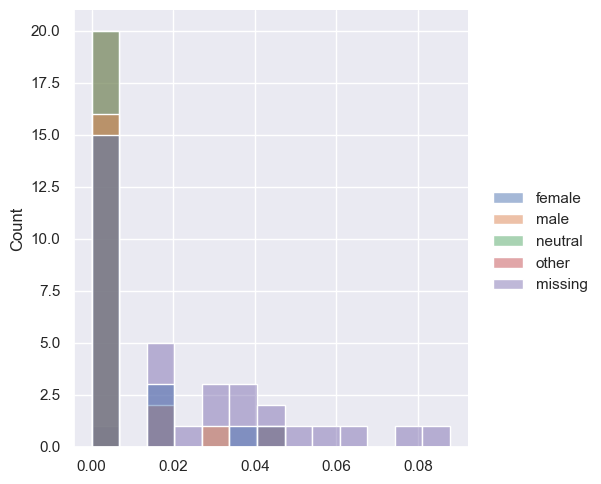

In [120]:
(
    sns.displot(df_gender_ratio)
)
